# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder



# Loading Data

In [2]:
df=pd.read_csv("./data_set/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Preprocessing

In [4]:
columns_to_drop = ['RowNumber', 'Surname', 'CustomerId', 'Geography']
df.drop(columns_to_drop, axis=1, inplace=True)

df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [6]:
max_age = df['Age'].max()
min_age = df['Age'].min()

print(f"Maximum Age: {max_age}")
print(f"Minimum Age: {min_age}")


Maximum Age: 92
Minimum Age: 18


# Data Visualization

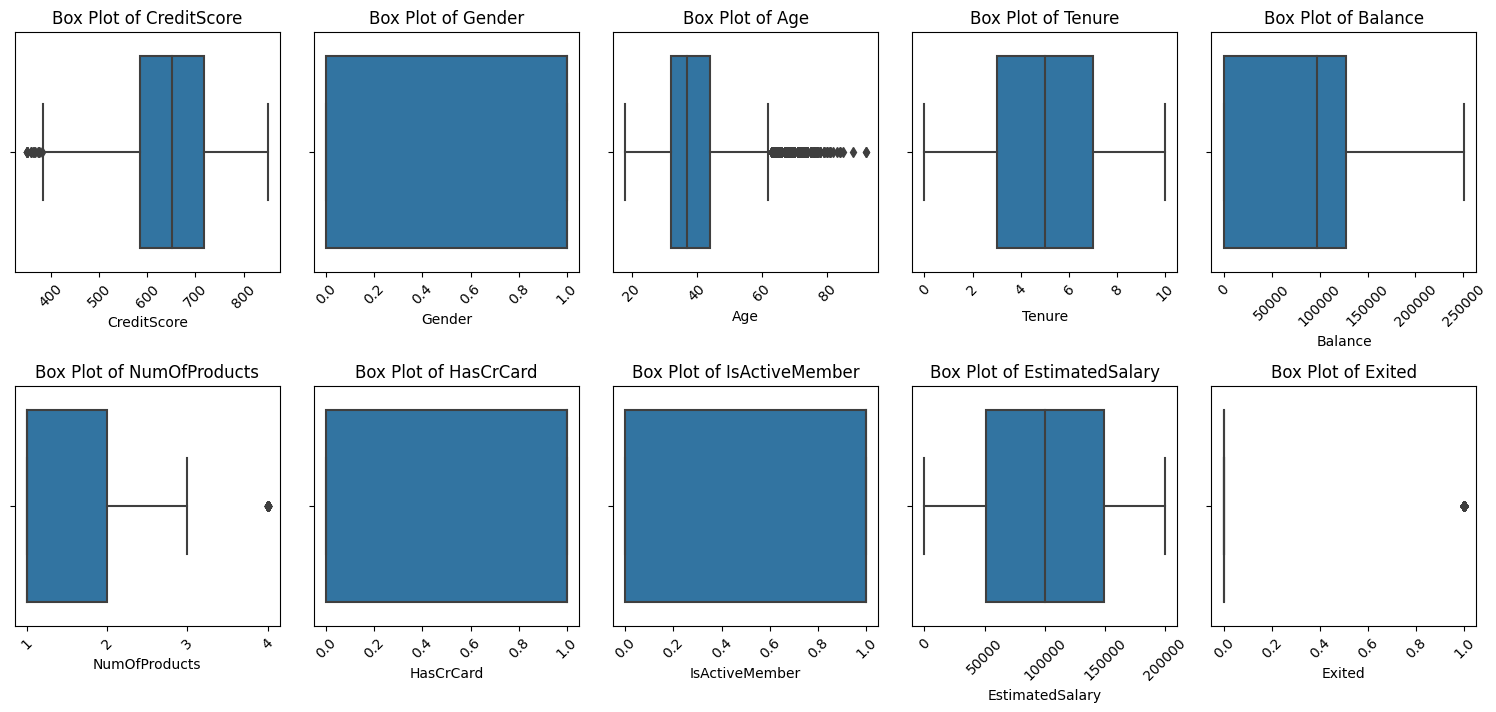

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 5, i) 
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xticks(rotation=45)  

plt.tight_layout()

plt.show()


# Categorizing Age and Dropping Original Age Column

In [8]:
data_age_classified = df.copy()


age_bins = [0, 18, 35, 50, 100]  
age_labels = ['0-18', '18-35', '35-50', '50+']  

data_age_classified['Age_Category'] = pd.cut(data_age_classified['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

data_age_classified = data_age_classified.drop(columns=['Age'])
data_age_classified.head()


,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category
0,619,0,2,0.00,1,1,1,101348.88,1,35-50
1,608,0,1,83807.86,1,0,1,112542.58,0,35-50
2,502,0,8,159660.80,3,1,0,113931.57,1,35-50
3,699,0,1,0.00,2,0,0,93826.63,0,35-50
4,850,0,2,125510.82,1,1,1,79084.10,0,35-50


# Training and Evaluating Models with Original Data

In [9]:



X = df.drop(columns=['Exited'])  
y = df['Exited']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Classifier', SVC(random_state=42)),
]

for model_name, model in models:
    print(f"Training and evaluating {model_name}...")
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_report_output = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_output)
    print("\n")


Training and evaluating Logistic Regression...
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



Training and evaluating Decision Tree...
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.48      0.46       393

    accuracy                           0.78      2000
   macro avg       0.65      0.66      0.66      2000
weighted avg       0.78      0.78      0.78      2000



Training and evaluating Random Forest...
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training and Evaluating Models with Classified Age Data

In [10]:

X = data_age_classified.drop(columns=['Exited'])  
y = data_age_classified['Exited']  
label_encoder = LabelEncoder()
X['Age_Category'] = label_encoder.fit_transform(X['Age_Category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Classifier', SVC(random_state=42)),
]

for model_name, model in models:
    print(f"Training and evaluating {model_name}...")
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_report_output = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_output)
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training and evaluating Logistic Regression...
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



Training and evaluating Decision Tree...
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1607
           1       0.46      0.50      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.79      0.79      2000



Training and evaluating Random Forest...
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
